In [1]:
import time
from ultralytics import YOLO
import cv2
import os
import re
import pandas as pd
import openpyxl
import io
import matplotlib.pyplot as plt
import numpy as np
import warnings

from collections import defaultdict

In [ ]:
def change_cwd(path):
    os.chdir(path)

def get_total_frames(video_path) :
    cap = cv2.VideoCapture(video_path)
    prop = int(cv2.CAP_PROP_FRAME_COUNT) 
    count = int(cv2.VideoCapture.get(cap, prop))
    return count
    
def process_video(model, video_path, output_folder, video_name, conf_threshold=0.6):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Unable to open video file {video_path}")
        return
    frame_idx = 1
    class_frames = defaultdict(list)
    frames_list = [''] * (get_total_frames(video_path) + 1)
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        results = model.predict(frame, conf=conf_threshold)
        detections = results[0].boxes

        for det in detections:
            class_id = int(det.cls)
            class_name = model.names[class_id]
            confidence = float(det.conf)
            class_frames[frame_idx].append((class_name, confidence))

        if not class_frames[frame_idx]:
            class_frames[frame_idx].append(("no_detection", 0))

        frame_idx += 1

    print("Capturing Done......")
    print("\n")

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    wb = openpyxl.Workbook()
    ws = wb.active
    ws.title = "Behaviour Frames"
    
    header_row = ["Frame", "Behaviour", "Confidence"]
    for col, value in enumerate(header_row, start=1):
        ws.cell(row=1, column=col).value = value
        
    row_idx = 2
    for frame_idx, detections in class_frames.items():
        behaviour_str = ",".join([det[0] for det in detections])
        confidence_str = ",".join([f"{det[1]:.3f}" for det in detections])
        ws.cell(row=row_idx, column=1).value = frame_idx
        ws.cell(row=row_idx, column=2).value = behaviour_str
        ws.cell(row=row_idx, column=3).value = confidence_str
        row_idx += 1
    print("Total number of frames anotated are : ", row_idx)    

    ws.cell(row=row_idx, column=1).value = "Total number of frames annotated:"
    ws.cell(row=row_idx, column=2).value = row_idx 
    wb.save(f"{output_folder}/{name}_behaviour_frames.xlsx")
    print("Processing complete.")

output_folder = r"D:\Raghav\Model_itch_others_loco\Paper 1.1 (YOLO weights) - Model\M1-base-acute-second-hour"
model = YOLO(r"D:\Raghav\Model_itch_others_loco\Paper 1.1 (YOLO weights) - Model\runs\detect\yolov9_train\weights\best.pt")
ind = 0
change_cwd(output_folder)
print(os.getcwd())
paths = [f for f in os.listdir(output_folder) if f.endswith('.mp4')]

for i in paths:
    name = re.search(r'([^\\]+)\.mp4$', i).group(1) 
    begin = time.time()
    process_video(model, i, output_folder, name, 0.5)
    end = time.time()

D:\Raghav\Model_itch_others_loco\Paper 1.1 (YOLO weights) - Model\M1-base-acute-second-hour

0: 384x640 1 Others, 107.4ms
Speed: 3.6ms preprocess, 107.4ms inference, 42.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 12.9ms
Speed: 2.0ms preprocess, 12.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.9ms
Speed: 1.0ms preprocess, 14.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 17.8ms
Speed: 0.0ms preprocess, 17.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.3ms
Speed: 2.0ms preprocess, 14.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 1

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 8.9ms
Speed: 1.0ms preprocess, 8.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.4ms
Speed: 1.0ms preprocess, 14.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.6ms
Speed: 1.0ms preprocess, 13.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 21.6ms
Speed: 1.0ms preprocess, 21.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 1

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.5ms
Speed: 1.0ms preprocess, 14.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.4ms
Speed: 0.2ms preprocess, 14.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




0: 384x640 1 Others, 13.6ms
Speed: 1.0ms preprocess, 13.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 0.0ms
Speed: 1.2ms preprocess, 0.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.4ms
Speed: 1.0ms preprocess, 14.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 15.2ms
Speed: 0.0ms preprocess, 15.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384,

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



0: 384x640 1 Locomotion, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Locomotion, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Locomotion, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Locomotion, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Locomotion, 13.8ms
Speed: 2.0ms preprocess, 13.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Locomotion, 14.6ms
Speed: 1.0ms preprocess, 14.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Locomotion, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Locomotion, 14.0ms
Speed: 1.6ms preprocess, 14.0ms inference, 1.0ms postproce

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Speed: 1.1ms preprocess, 13.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.5ms
Speed: 1.0ms preprocess, 13.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.6ms
Speed: 1.0ms preprocess, 14.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.0ms
Speed: 1.6ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 19.1ms
Speed: 0.0ms preprocess, 19.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others,

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 5.3ms
Speed: 0.6ms preprocess, 5.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.4ms
Speed: 2.0ms preprocess, 13.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.6ms
Speed: 1.0ms preprocess, 13.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



0: 384x640 1 Others, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 6.1ms
Speed: 1.0ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.4ms
Speed: 1.0ms preprocess, 14.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.0ms
Speed: 1.7ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Speed: 0.0ms preprocess, 0.0ms inference, 15.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 11.8ms
Speed: 1.0ms preprocess, 11.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.4ms
Speed: 1.0ms preprocess, 13.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 1.6ms
Speed: 1.0ms preprocess, 1.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 1

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



0: 384x640 1 Others, 1.7ms
Speed: 1.0ms preprocess, 1.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.3ms
Speed: 2.0ms preprocess, 13.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.8ms
Speed: 1.0ms preprocess, 13.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 7.1ms
Speed: 1.0ms preprocess, 7.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 64

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.6ms
Speed: 2.0ms preprocess, 13.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.4ms
Speed: 2.0ms preprocess, 13.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 5.7ms
Speed: 2.0ms preprocess, 5.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 4.4ms
Speed: 1.0ms preprocess, 4.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.4ms
Speed: 1.0ms preprocess, 14.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384,

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



0: 384x640 1 Others, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.4ms
Speed: 2.0ms preprocess, 14.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 0.7ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 15.0ms
Speed: 0.7ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 22.3ms
Speed: 0.0ms preprocess, 22.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.6ms
Speed: 1.0ms preprocess, 13.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.6ms
Speed: 1.0ms preprocess, 14.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.4ms
Speed: 1.0ms preprocess, 14.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



0: 384x640 1 Others, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Speed: 1.0ms preprocess, 16.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 16.5ms
Speed: 0.0ms preprocess, 16.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 16.0ms
Speed: 1.0ms preprocess, 16.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 15.4ms
Speed: 1.0ms preprocess, 15.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Others,

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



0: 384x640 1 Locomotion, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Locomotion, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Locomotion, 14.4ms
Speed: 1.0ms preprocess, 14.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Locomotion, 13.6ms
Speed: 1.0ms preprocess, 13.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Locomotion, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Locomotion, 13.7ms
Speed: 1.0ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Locomotion, 14.7ms
Speed: 1.0ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Locomotion, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 1.0ms postproce

In [16]:
# def filter_behaviours(input_excel_path, output_excel_path):
#     wb = openpyxl.load_workbook(input_excel_path)
#     ws = wb.active

#     df = pd.DataFrame(ws.values)
#     if df.shape[1] < 2:
#         raise ValueError("The input Excel file must have at least two columns")
#     behaviours = df.iloc[:, 1]
#     output_df = pd.DataFrame(columns=["Seconds", "Behaviour"])
#     for i in range(0, len(behaviours), 30):
#         chunk = behaviours[i:i+30]
#         behaviour_counts = chunk.value_counts()
#         majority_behaviour = behaviour_counts.index[0]
#         if len(behaviour_counts.index) > 1 and majority_behaviour == "Others" and behaviour_counts.index[1] == 'Itch':
#             majority_behaviour = 'Itch'
#         if majority_behaviour in ["Itch,Locomotion", "Locomotion,Itch", "Itch,Others", "Others,Itch"]:
#             majority_behaviour = "Itch"
#         if majority_behaviour in ["Locomotion,Others", "Others,Locomotion"]:
#             majority_behaviour = "Locomotion,Others"
#         elif :
            
#         new_row = pd.DataFrame({"Seconds": [i//30 + 1], "Behaviour": [majority_behaviour]})
#         output_df = pd.concat([output_df, new_row], ignore_index=True)

#     with pd.ExcelWriter(output_excel_path, mode="w", engine="openpyxl") as writer:
#         output_df.to_excel(writer, sheet_name="Second-wise Behaviours", index=False)

#         behaviour_durations = output_df.groupby("Behaviour")["Seconds"].count().reset_index()
#         behaviour_durations.columns = ["Behaviour", "Total Duration (s)"]

#         all_behaviours = ["Locomotion", "Others", "Itch", "no_detection"]
#         for behaviour in all_behaviours:
#             if behaviour not in behaviour_durations["Behaviour"].values:
#                 new_row = pd.DataFrame({"Behaviour": [behaviour], "Total Duration (s)": [0]})
#                 behaviour_durations = pd.concat([behaviour_durations, new_row], ignore_index=True)

#         behaviour_durations = behaviour_durations.sort_values("Behaviour")  # sort by behaviour
#         behaviour_durations.to_excel(writer, sheet_name="Behaviour Durations", index=False)

# output_folder = r"D:\Raghav\Model_itch_others_loco\Paper 1.1 (YOLO weights) - Model\Raster-generation-input"
# os.chdir(output_folder)
# paths = [f for f in os.listdir(output_folder) if f.endswith('.xlsx')]
# print(paths)
# for i in paths:
#     output_path = "raster_plot_input_" + i
#     if not os.path.exists(output_path):
#         wb = openpyxl.Workbook()
#         wb.save(output_path)
#     filter_behaviours(i, output_path)

['M1-acute-for-rasterplot_behaviour_frames.xlsx', 'M1-baseline-for-rasterplot_behaviour_frames.xlsx']


In [3]:
def filter_behaviours(input_excel_path, output_excel_path):
    wb = openpyxl.load_workbook(input_excel_path)
    ws = wb.active

    df = pd.DataFrame(ws.values)
    if df.shape[1] < 2:
        raise ValueError("The input Excel file must have at least two columns")
    behaviours = df.iloc[:, 1]
    output_df = pd.DataFrame(columns=["Seconds", "Behaviour"])
    for i in range(0, len(behaviours), 30):
        chunk = behaviours[i:i+30]
        behaviour_counts = chunk.value_counts()
        majority_behaviour = behaviour_counts.index[0]
        if len(behaviour_counts.index) > 1 and majority_behaviour == "Others" and behaviour_counts.index[1] == 'Itch':
            majority_behaviour = 'Itch'
        if majority_behaviour in ["Itch,Locomotion", "Locomotion,Itch", "Itch,Others", "Others,Itch"]:
            majority_behaviour = "Itch"
        elif majority_behaviour in ["Locomotion,Others", "Others,Locomotion"]:
            majority_behaviour = 'Locomotion,Others'
        elif "Locomotion" in majority_behaviour and "Others" in majority_behaviour:
            majority_behaviour = "Locomotion,Others"
        elif "Locomotion" in majority_behaviour:
            majority_behaviour = "Locomotion"
        elif "Others" in majority_behaviour:
            majority_behaviour = "Others"
        elif "Itch" in majority_behaviour:
            majority_behaviour = "Itch"

        new_row = pd.DataFrame({"Seconds": [i//30 + 1], "Behaviour": [majority_behaviour]})
        output_df = pd.concat([output_df, new_row], ignore_index=True)

    with pd.ExcelWriter(output_excel_path, mode="w", engine="openpyxl") as writer:
        output_df.to_excel(writer, sheet_name="Second-wise Behaviours", index=False)

        behaviour_durations = output_df.groupby("Behaviour")["Seconds"].count().reset_index()
        behaviour_durations.columns = ["Behaviour", "Total Duration (s)"]

        all_behaviours = ["Locomotion", "Others", "Itch", "no_detection"]
        for behaviour in all_behaviours:
            if behaviour not in behaviour_durations["Behaviour"].values:
                new_row = pd.DataFrame({"Behaviour": [behaviour], "Total Duration (s)": [0]})
                behaviour_durations = pd.concat([behaviour_durations, new_row], ignore_index=True)

        behaviour_durations = behaviour_durations.sort_values("Behaviour")  # sort by behaviour
        behaviour_durations.to_excel(writer, sheet_name="Behaviour Durations", index=False)

output_folder = r"D:\Raghav\Model_itch_others_loco\Paper 1.1 (YOLO weights) - Model\M1-base-acute-second-hour"
os.chdir(output_folder)
paths = [f for f in os.listdir(output_folder) if f.endswith('.xlsx')]
print(paths)
for i in paths:
    output_path = "raster_plot_input_" + i
    if not os.path.exists(output_path):
        wb = openpyxl.Workbook()
        wb.save(output_path)
    filter_behaviours(i, output_path)

['M1-acute-input-second-hour_behaviour_frames.xlsx', 'M1-baseline-input-second-hour_behaviour_frames.xlsx']


KeyError: 'Behaviour'

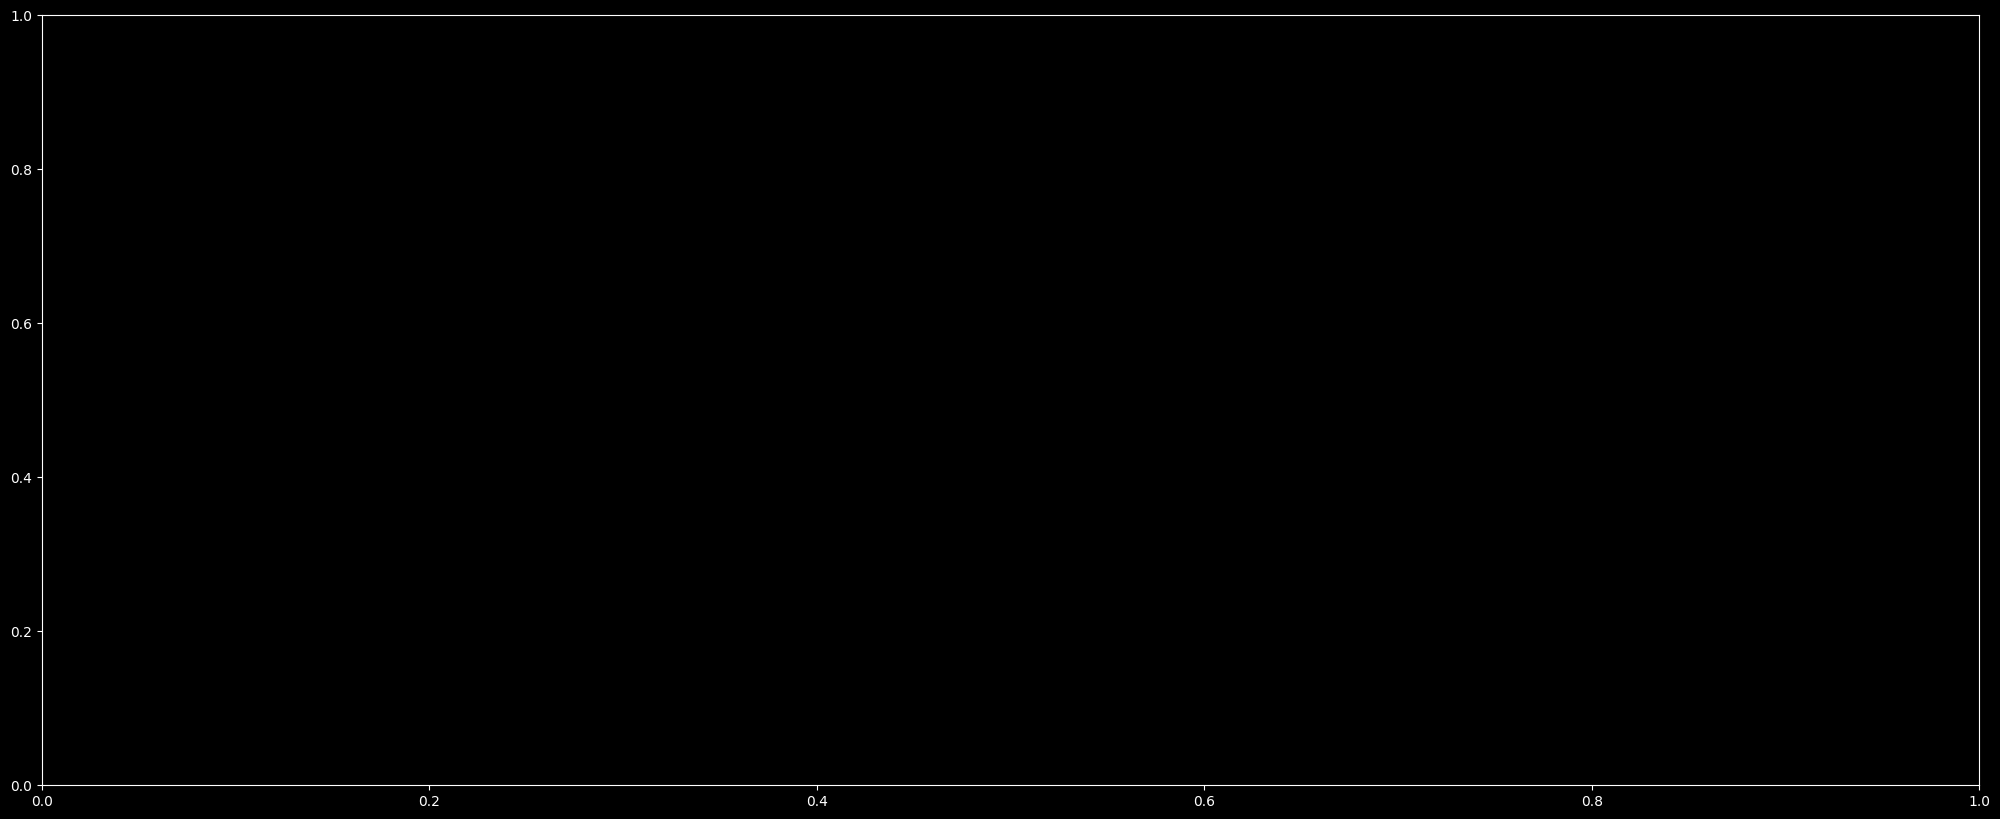

In [15]:
df = pd.read_excel(r'D:\Raghav\Model_itch_others_loco\Paper 1.1 (YOLO weights) - Model\Raster-generation-input\behaviour_output.xlsx')
behaviours = df.columns[2:]  
plt.figure(figsize=(25, 10))
row_height = 3

colors = ['#377eb8', '#ff7f00', '#4daf4a']

bg = plt.axes()

for i, behaviour in enumerate(behaviours):
    frames = df[df[behaviour] == 1]['Behaviour']
    intervals = [(frame, 1) for frame in frames]
    plt.broken_barh(intervals, (row_height * i, 2), facecolors=colors[i % len(colors)])

plt.yticks(list(range(0, row_height * len(behaviours), row_height)), behaviours, weight="bold")
plt.xticks(list(range(int(df['Behaviour'].min()), int(df['Bhevaiour'].max() + 1), 50)), weight="bold")

plt.ylabel("BEHAVIOUR", weight="bold")
plt.xlabel("Frame", weight="bold")
plt.title("Behavioral Raster", weight="bold")
plt.style.use('dark_background') 

plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r'D:\Raghav\Model_itch_others_loco\Paper 1.1 (YOLO weights) - Model\M1-base-acute-second-hour\Raster-generation-input\raster_plot_input_M1-acute-input-second-hour_behaviour_frames.xslx')

frame_df = df[['Behaviour']]
behaviour_df = df.drop('Behaviour', axis=1)

behaviour_df = pd.get_dummies(behaviour_df, columns=behaviour_df.columns)

behaviour_df = pd.concat([frame_df, behaviour_df], axis=1)

behaviour_df.to_excel('behaviour_output.xlsx', index=False)

plt.figure(figsize=(25, 10))
row_height = 3

colors = ['#377eb8', '#ff7f00', '#4daf4a']

bg = plt.axes()

for i, behaviour in enumerate(behaviour_df.columns[1:]):
    frames = df[df[behaviour] == 1]['Frame']
    intervals = [(frame, 1) for frame in frames]
    plt.broken_barh(intervals, (row_height * i, 2), facecolors=colors[i % len(colors)])

plt.yticks(list(range(0, row_height * len(behaviour_df.columns[1:]), row_height)), behaviour_df.columns[1:], weight="bold")
plt.xticks(list(range(int(df['Frame'].min()), int(df['Frame'].max() + 1), 50)), weight="bold")

plt.ylabel("BEHAVIOUR", weight="bold")
plt.xlabel("Frame", weight="bold")
plt.title("Behavioral Raster", weight="bold")
plt.style.use('dark_background') 

plt.show()

KeyError: "None of [Index(['Frame'], dtype='object')] are in the [columns]"

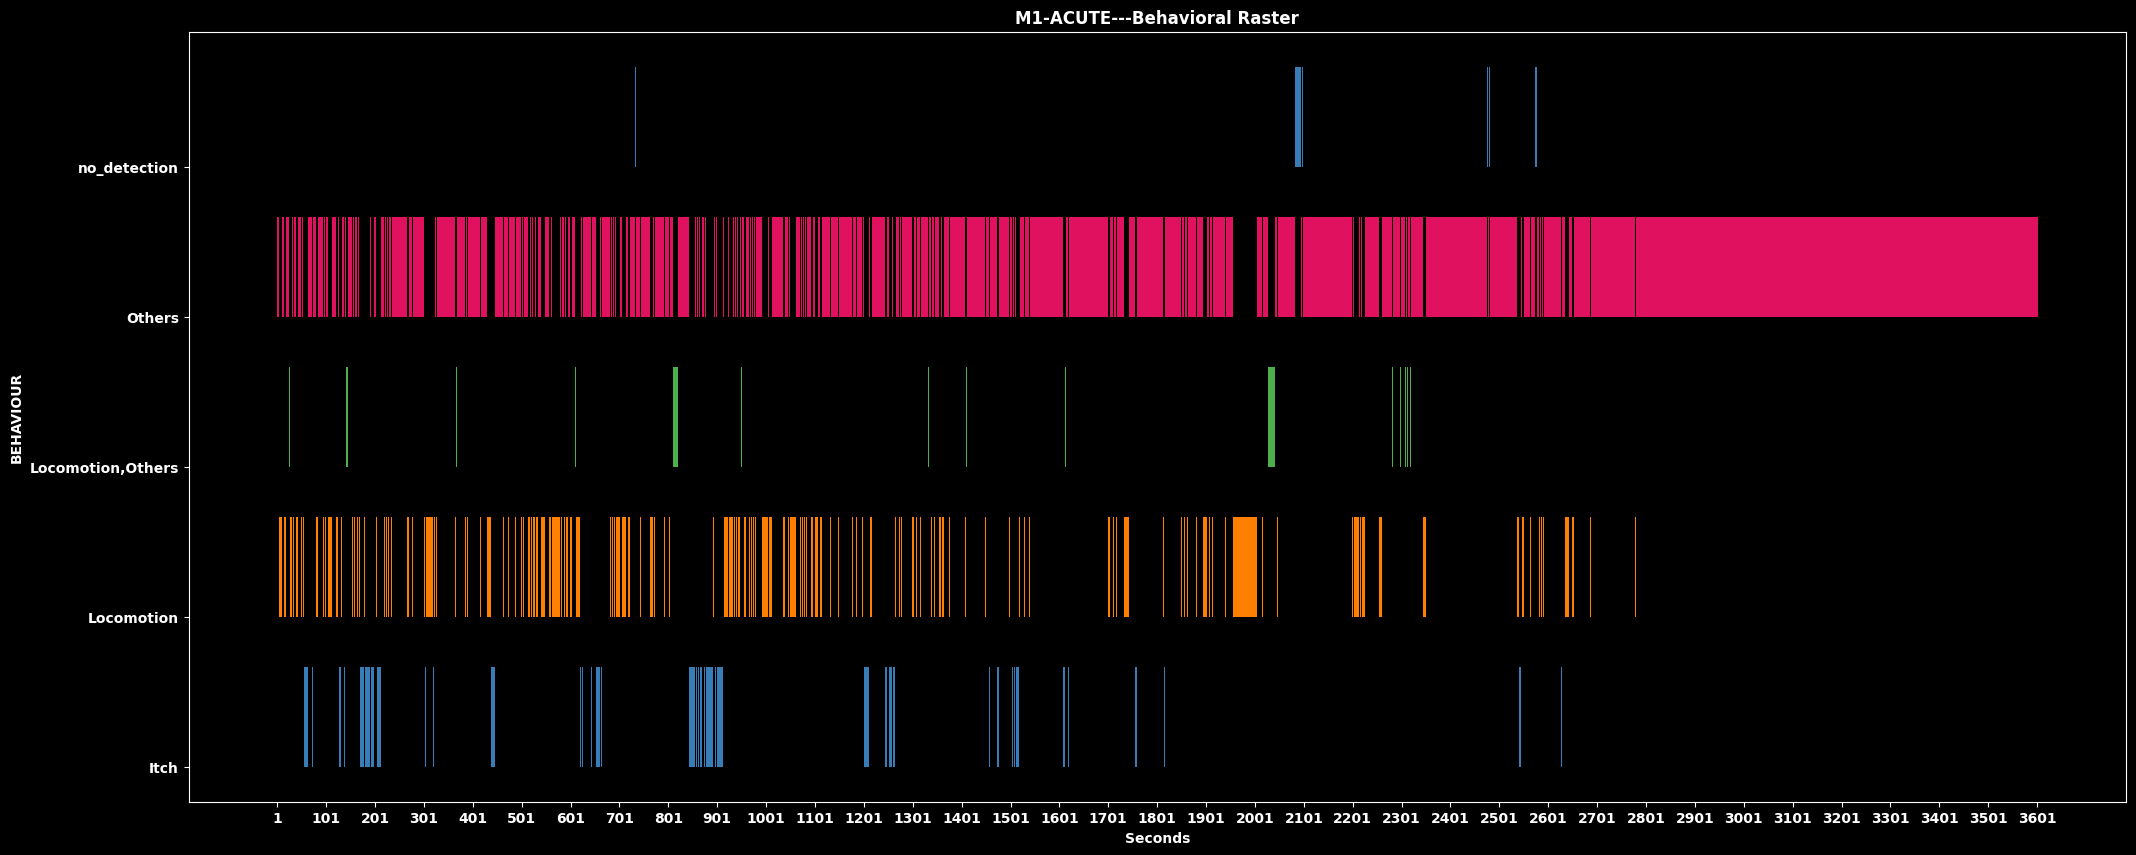

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel(r'D:\Raghav\Model_itch_others_loco\Paper 1.1 (YOLO weights) - Model\Raster-generation-input\raster_plot_input_M1-acute-for-rasterplot_behaviour_frames.xlsx')

# Pivot the dataframe to create a binary matrix for each behaviour
behaviour_df = df.pivot_table(index='Seconds', columns='Behaviour', aggfunc='size', fill_value=0).reset_index()

# Save the result to an Excel file
behaviour_df.to_excel('final-raster-behaviour_output_acute.xlsx', index=False)

# Create the raster plot
plt.figure(figsize=(25, 10))
row_height = 3

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#E0115F']

bg = plt.axes()

for i, behaviour in enumerate(behaviour_df.columns[1:]):
    frames = behaviour_df[behaviour][behaviour_df[behaviour] == 1].index
    intervals = [(frame, 1) for frame in frames]
    plt.broken_barh(intervals, (row_height * i, 2), facecolors=colors[i % len(colors)])

plt.yticks(list(range(0, row_height * len(behaviour_df.columns[1:]), row_height)), behaviour_df.columns[1:], weight="bold")
plt.xticks(list(range(int(behaviour_df['Seconds'].min()), int(behaviour_df['Seconds'].max() + 1), 100)), weight="bold")

plt.ylabel("BEHAVIOUR", weight="bold")
plt.xlabel("Seconds", weight="bold")
plt.title("M1-ACUTE---Behavioral Raster", weight="bold")
# plt.style.use('dark_background') 

plt.show()

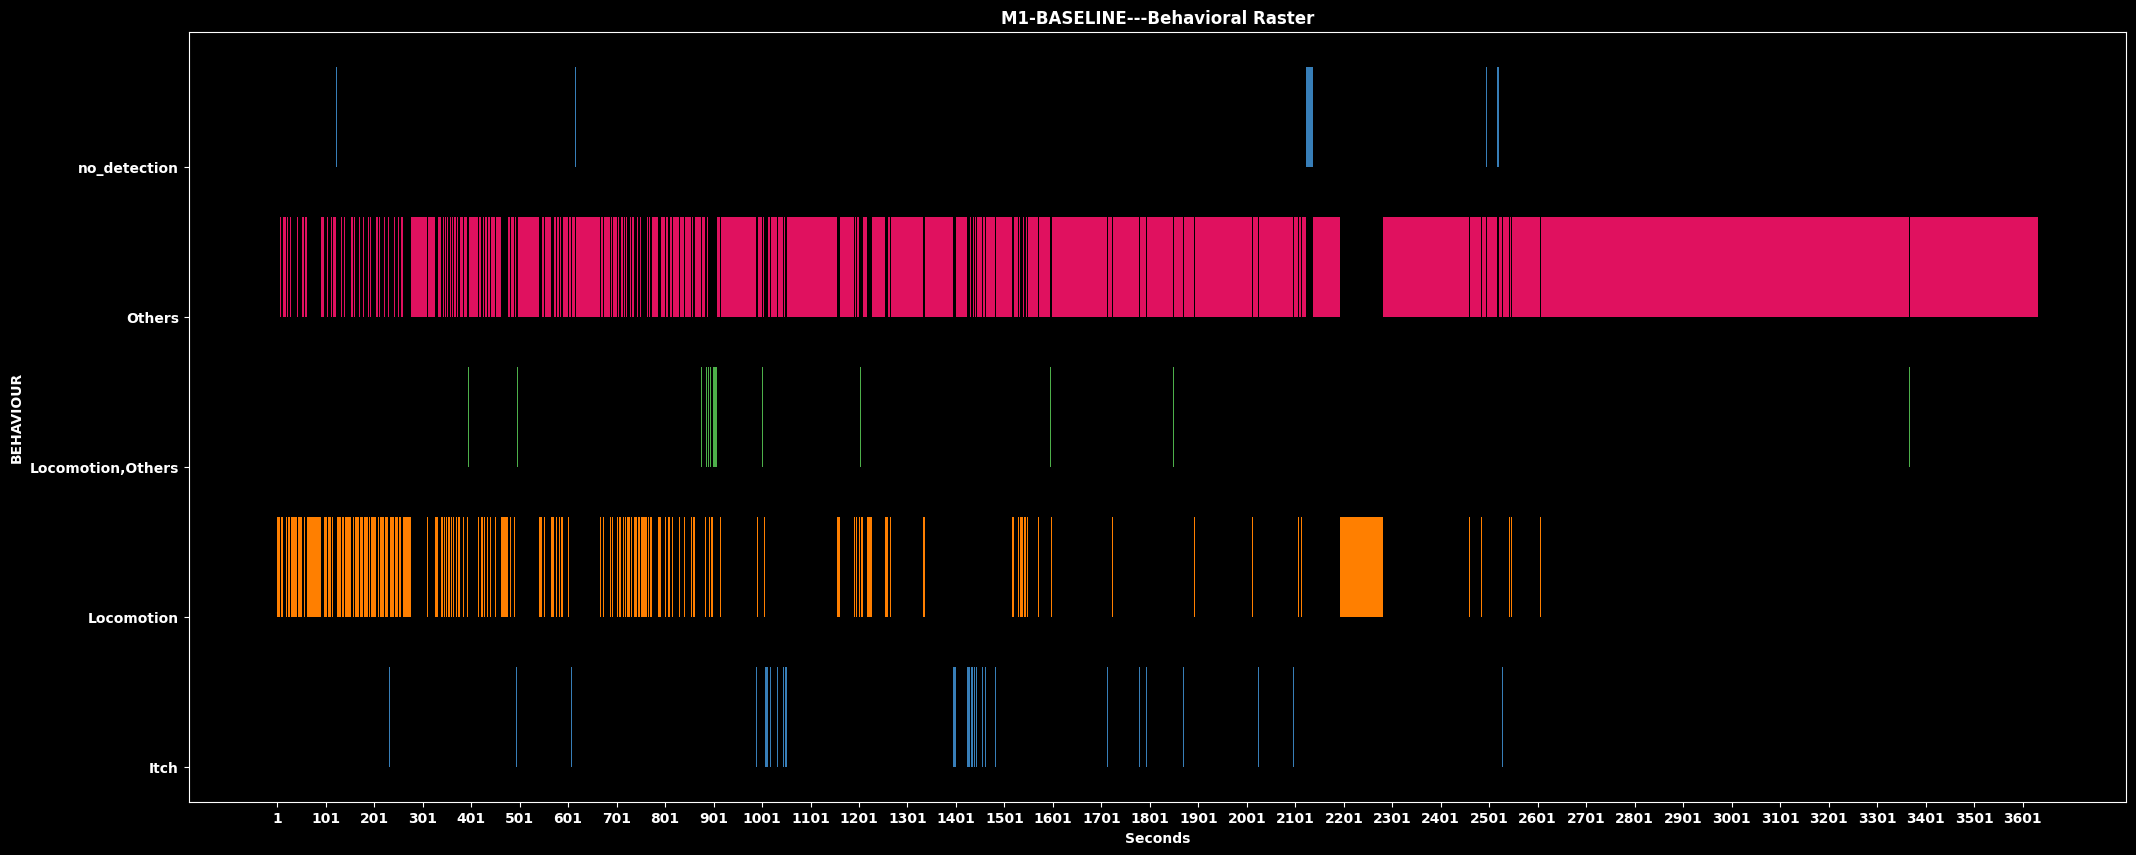

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel(r'D:\Raghav\Model_itch_others_loco\Paper 1.1 (YOLO weights) - Model\Raster-generation-input\raster_plot_input_M1-baseline-for-rasterplot_behaviour_frames.xlsx')

frame_df = df[['Behaviour']]
behaviour_df = df.drop('Behaviour', axis=1)

behaviour_df = pd.get_dummies(behaviour_df, columns=behaviour_df.columns)

behaviour_df = pd.concat([frame_df, behaviour_df], axis=1)

# Pivot the dataframe to create a binary matrix for each behaviour
behaviour_df = df.pivot_table(index='Seconds', columns='Behaviour', aggfunc='size', fill_value=0).reset_index()

# Save the result to an Excel file
behaviour_df.to_excel('final_raster_behaviour_output1_baseline.xlsx', index=False)

# Create the raster plot
plt.figure(figsize=(25, 10))
row_height = 3

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#E0115F']

bg = plt.axes()

for i, behaviour in enumerate(behaviour_df.columns[1:]):
    frames = behaviour_df[behaviour][behaviour_df[behaviour] == 1].index
    intervals = [(frame, 1) for frame in frames]
    plt.broken_barh(intervals, (row_height * i, 2), facecolors=colors[i % len(colors)])

plt.yticks(list(range(0, row_height * len(behaviour_df.columns[1:]), row_height)), behaviour_df.columns[1:], weight="bold")
plt.xticks(list(range(int(behaviour_df['Seconds'].min()), int(behaviour_df['Seconds'].max() + 1), 100)), weight="bold")

plt.ylabel("BEHAVIOUR", weight="bold")
plt.xlabel("Seconds", weight="bold")
plt.title("M1-BASELINE---Behavioral Raster", weight="bold")
# plt.style.use('dark_background') 

plt.show()

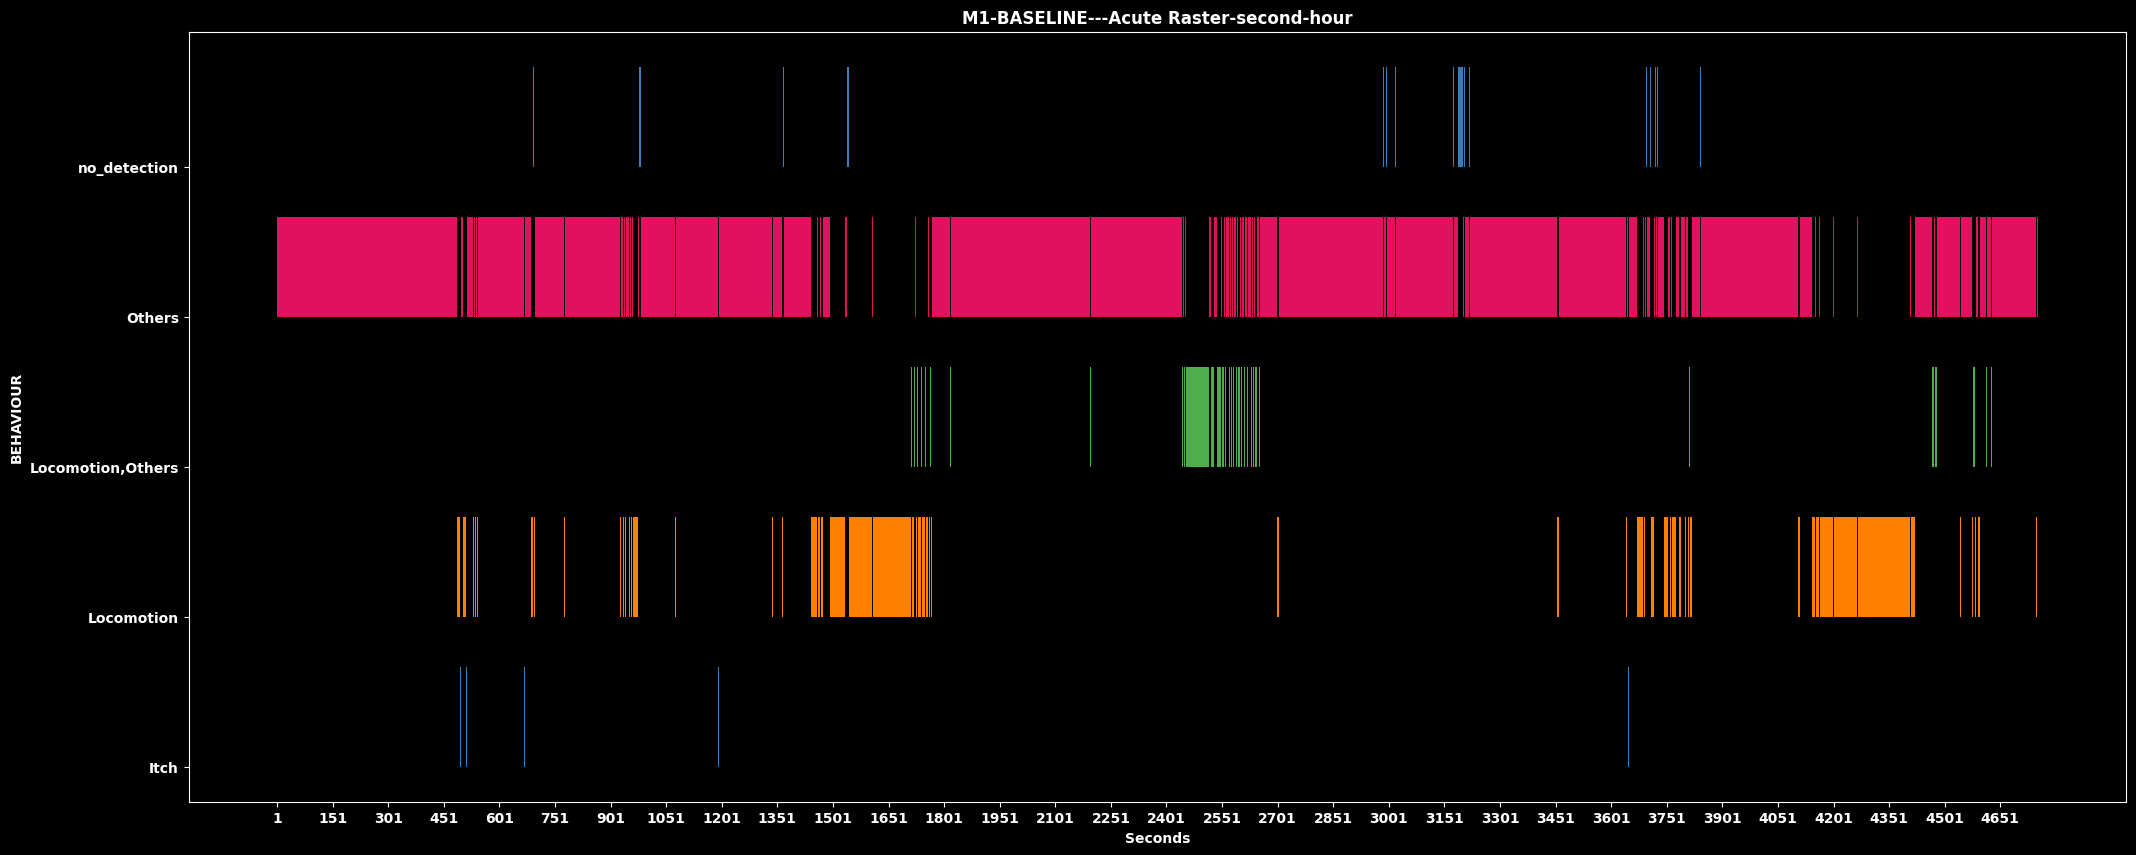

In [11]:
# D:\Raghav\Model_itch_others_loco\Paper 1.1 (YOLO weights) - Model\M1-base-acute-second-hour\Raster-generation-input\raster_plot_input_M1-acute-input-second-hour_behaviour_frames.xslx

import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel(r'D:\Raghav\Model_itch_others_loco\Paper 1.1 (YOLO weights) - Model\M1-base-acute-second-hour\raster_plot_input_M1-acute-input-second-hour_behaviour_frames.xlsx')

frame_df = df[['Behaviour']]
behaviour_df = df.drop('Behaviour', axis=1)

behaviour_df = pd.get_dummies(behaviour_df, columns=behaviour_df.columns)

behaviour_df = pd.concat([frame_df, behaviour_df], axis=1)

# Pivot the dataframe to create a binary matrix for each behaviour
behaviour_df = df.pivot_table(index='Seconds', columns='Behaviour', aggfunc='size', fill_value=0).reset_index()

# Save the result to an Excel file
behaviour_df.to_excel('final_raster_behaviour_output1_baseline1.xlsx', index=False)

# Create the raster plot
plt.figure(figsize=(25, 10))
row_height = 3

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#E0115F']

bg = plt.axes()

for i, behaviour in enumerate(behaviour_df.columns[1:]):
    frames = behaviour_df[behaviour][behaviour_df[behaviour] == 1].index
    intervals = [(frame, 1) for frame in frames]
    plt.broken_barh(intervals, (row_height * i, 2), facecolors=colors[i % len(colors)])

plt.yticks(list(range(0, row_height * len(behaviour_df.columns[1:]), row_height)), behaviour_df.columns[1:], weight="bold")
plt.xticks(list(range(int(behaviour_df['Seconds'].min()), int(behaviour_df['Seconds'].max() + 1), 150)), weight="bold")

plt.ylabel("BEHAVIOUR", weight="bold")
plt.xlabel("Seconds", weight="bold")
plt.title("M1-BASELINE---Acute Raster-second-hour", weight="bold")
plt.style.use('dark_background') 

plt.show()

In [ ]:
raster_plot_input_M1-baseline-input-second-hour_behaviour_frames